<a href="https://colab.research.google.com/github/jeremy-jewett/DS-Unit-2-Kaggle-Challenge/blob/master/Jeremy_Jewett_LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [ ]:
train, val = train_test_split(train, test_size=len(test),  
                              stratify=train['status_group'], random_state=42)

In [ ]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [ ]:
import numpy as np
import sklearn
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns='quantity_group')
    

    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [ ]:
val['status_group'] = val['status_group'].replace(
    {'non functional':1, 'functional needs repair':2, 'functional':3})

In [ ]:
train['status_group'] = train['status_group'].replace(
        {'non functional':1, 'functional needs repair':2, 'functional':3})
train['status_group'].head(10)

45793    1
26326    1
53251    1
26791    3
2162     3
14686    3
57063    2
58277    1
18025    3
55692    1
Name: status_group, dtype: int64

In [ ]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features #+ categorical_features

In [ ]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=13, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Test Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9999777984991786
Test Accuracy: 0.7121465385151136


In [ ]:
pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    ce.OrdinalEncoder(),
    RandomForestClassifier(random_state=13, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Test Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9999777984991786
Test Accuracy: 0.7138877280958351


In [ ]:
'''

THIS IS 80.888

from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    #ce.OneHotEncoder(use_cat_names=True),
    ce.MEstimateEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(max_depth=23, n_estimators=66, random_state=12, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Test Accuracy:', pipeline.score(X_val, y_val))
'''

"\n\nTHIS IS 80.888\n\nfrom sklearn.ensemble import RandomForestRegressor\n\npipeline = make_pipeline(\n    #ce.OneHotEncoder(use_cat_names=True),\n    ce.MEstimateEncoder(),\n    SimpleImputer(strategy='mean'),\n    RandomForestClassifier(max_depth=23, n_estimators=66, random_state=12, n_jobs=-1)\n)\n\n\npipeline.fit(X_train, y_train)\ny_pred = pipeline.predict(X_test)\nprint('Train Accuracy:', pipeline.score(X_train, y_train))\nprint('Test Accuracy:', pipeline.score(X_val, y_val))\n"

In [ ]:
'''

THIS IS 80.93

pipeline = make_pipeline(
    #ce.OneHotEncoder(use_cat_names=True),
    ce.BaseNEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(max_depth=24, n_estimators=177, random_state=12, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Test Accuracy:', pipeline.score(X_val, y_val))
'''

Train Accuracy: 0.9840593224101949
Test Accuracy: 0.8093745647026048


In [ ]:
pipeline = make_pipeline(
    #ce.OneHotEncoder(use_cat_names=True),
    ce.MEstimateEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(max_depth=25, n_estimators=177, random_state=12, n_jobs=-1)
)


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Test Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9968473868833533
Test Accuracy: 0.7168825741746762


In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(min_samples_leaf=5, random_state=13)
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Test Accuracy:', pipeline.score(X_val, y_val))


Train Accuracy: 0.8410372541183784
Test Accuracy: 0.6592143752611784


In [ ]:
y_pred

array([3, 3, 3, ..., 3, 3, 1])

In [ ]:
y_pred = y_pred.astype('object')
def convert(X):
  X[X==1] = 'non functional'
  X[X==2] = 'functional needs repair'
  X[X==3] = 'functional'
  return X

In [ ]:
convert(y_pred)
convert(y_val)
convert(y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


45793    non functional
26326    non functional
53251    non functional
26791        functional
2162         functional
              ...      
11089    non functional
30159    non functional
17861    non functional
8192         functional
49783        functional
Name: status_group, Length: 45042, dtype: object

In [ ]:
y_pred

array([3, 3, 3, ..., 3, 3, 1], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
unique_labels(y_val)

array([1, 2, 3])

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index
plot_confusion_matrix(y_val, y_pred)

(['Predicted 1', 'Predicted 2', 'Predicted 3'],
 ['Actual 1', 'Actual 2', 'Actual 3'])

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns =  [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

ValueError: ignored

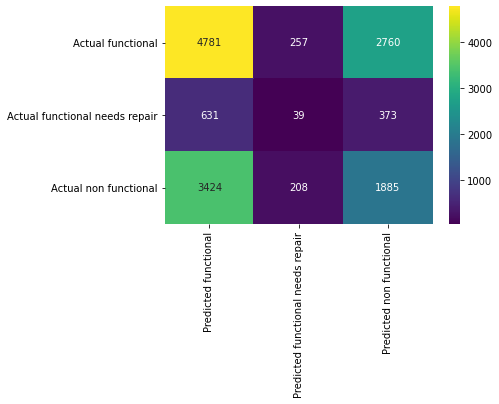

In [ ]:
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [ ]:
correct_predictions = 4783+38+1878
total_predictions = 4783+268+2747+628+38+377+3424+215+1878
correct_predictions / total_predictions

0.46656916005014626

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.4669870455495194

In [ ]:
y_train = y_train != 'functional'
y_val = y_val != 'functional'
y_train.value_counts(normalize=True)

False    0.543071
True     0.456929
Name: status_group, dtype: float64

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

False    11867
True      2491
dtype: int64

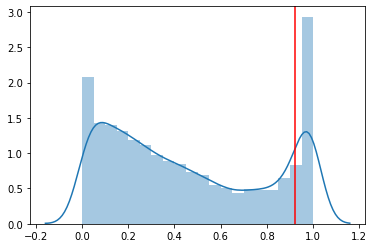

In [ ]:
threshold = 0.92

y_pred_proba = pipeline.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.distplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [ ]:

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv("Your_Submission.csv", index = False)

In [ ]:
'''
from sklearn.model_selection import cross_val_score
pipeline = make_pipeline(
    ce.TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)
'''

"\nfrom sklearn.model_selection import cross_val_score\npipeline = make_pipeline(\n    ce.TargetEncoder(min_samples_leaf=1, smoothing=1), \n    SimpleImputer(strategy='median'), \n    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)\n)\n\nk = 3\nscores = cross_val_score(pipeline, X_train, y_train, cv=k, \n                         scoring='neg_mean_absolute_error')\nprint(f'MAE for {k} folds:', -scores)\n"